# Full Name: ADESIYAN OMOTAYO OLUFEMI
 

# KAGGLE ID: omotayo 

# Student Status: ACTIVE 

# Gender: Male

# AI+Club: DataScienceIfe

# Name of School; OBAFEMI AWOLOWO UNIVERSITY

In [ ]:
import pandas as pd

# importing the dataset 

In [6]:
data = pd.read_csv(r'C:\Users\maximus\Videos\data analyses\intercampusai2019\train.csv')

# Exploratory Data Analysis (EDA)

In [87]:
data.head()

,EmployeeNo,Division,Qualification,Gender,Channel_of_Recruitment,Trainings_Attended,Year_of_birth,Last_performance_score,Year_of_recruitment,Targets_met,Previous_Award,Training_score_average,State_Of_Origin,Foreign_schooled,Marital_Status,Past_Disciplinary_Action,Previous_IntraDepartmental_Movement,No_of_previous_employers,Promoted_or_Not
0,YAK/S/00001,Commercial Sales and Marketing,"MSc, MBA and PhD",Female,Direct Internal process,2,1986,12.5,2011,1,0,41,ANAMBRA,No,Married,No,No,0,0
1,YAK/S/00002,Customer Support and Field Operations,First Degree or HND,Male,Agency and others,2,1991,12.5,2015,0,0,52,ANAMBRA,Yes,Married,No,No,0,0
2,YAK/S/00003,Commercial Sales and Marketing,First Degree or HND,Male,Direct Internal process,2,1987,7.5,2012,0,0,42,KATSINA,Yes,Married,No,No,0,0
3,YAK/S/00004,Commercial Sales and Marketing,First Degree or HND,Male,Agency and others,3,1982,2.5,2009,0,0,42,NIGER,Yes,Single,No,No,1,0
4,YAK/S/00006,Information and Strategy,First Degree or HND,Male,Direct Internal process,3,1990,7.5,2012,0,0,77,AKWA IBOM,Yes,Married,No,No,1,0


In [8]:
data.info()   # THIS IS TO CHECK THE TYPR OF DATA WE ARE DEALING WITH. EITHER OBJECT, FLOAT, INT64.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38312 entries, 0 to 38311
Data columns (total 19 columns):
EmployeeNo                             38312 non-null object
Division                               38312 non-null object
Qualification                          36633 non-null object
Gender                                 38312 non-null object
Channel_of_Recruitment                 38312 non-null object
Trainings_Attended                     38312 non-null int64
Year_of_birth                          38312 non-null int64
Last_performance_score                 38312 non-null float64
Year_of_recruitment                    38312 non-null int64
Targets_met                            38312 non-null int64
Previous_Award                         38312 non-null int64
Training_score_average                 38312 non-null int64
State_Of_Origin                        38312 non-null object
Foreign_schooled                       38312 non-null object
Marital_Status                         383

In [9]:
data.describe() # THE COUNT ROW gives us insight into the number of rows the numeric columns has and if thier are any missing values 
# the MEAN gives us the arithmeticc avearge of the data points, STD row shows us how disperse from the mean the data is etc

,Trainings_Attended,Year_of_birth,Last_performance_score,Year_of_recruitment,Targets_met,Previous_Award,Training_score_average,Promoted_or_Not
count,38312.000000,38312.000000,38312.000000,38312.000000,38312.000000,38312.000000,38312.000000,38312.000000
mean,2.253680,1986.209334,7.698959,2013.139695,0.352996,0.023152,55.366465,0.084595
std,0.609443,7.646047,3.744135,4.261451,0.477908,0.150388,13.362741,0.278282
min,2.000000,1950.000000,0.000000,1982.000000,0.000000,0.000000,31.000000,0.000000
25%,2.000000,1982.000000,5.000000,2012.000000,0.000000,0.000000,43.000000,0.000000
50%,2.000000,1988.000000,7.500000,2014.000000,0.000000,0.000000,52.000000,0.000000
75%,2.000000,1992.000000,10.000000,2016.000000,1.000000,0.000000,68.000000,0.000000
max,11.000000,2001.000000,12.500000,2018.000000,1.000000,1.000000,91.000000,1.000000


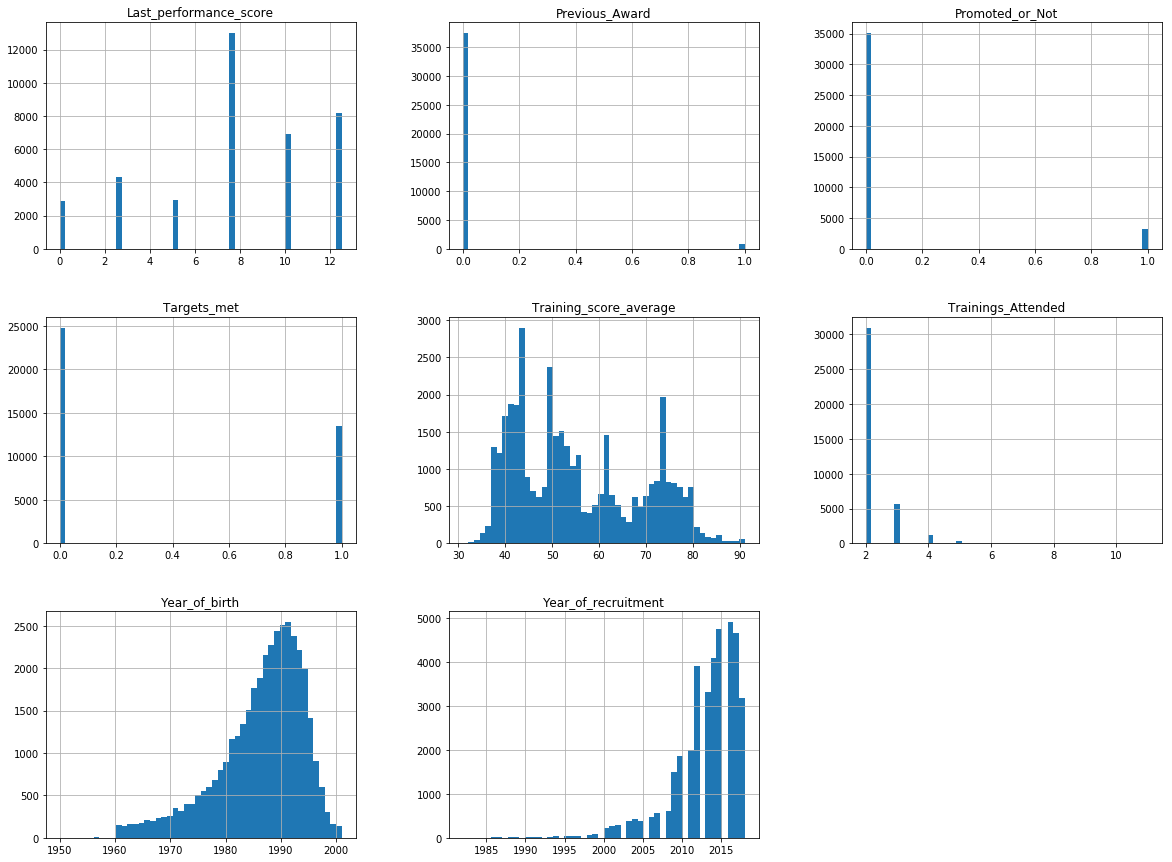

In [8]:
import matplotlib.pyplot as plt
data.hist(bins=50, figsize=(20,15)) 
viz = plt.show()
viz

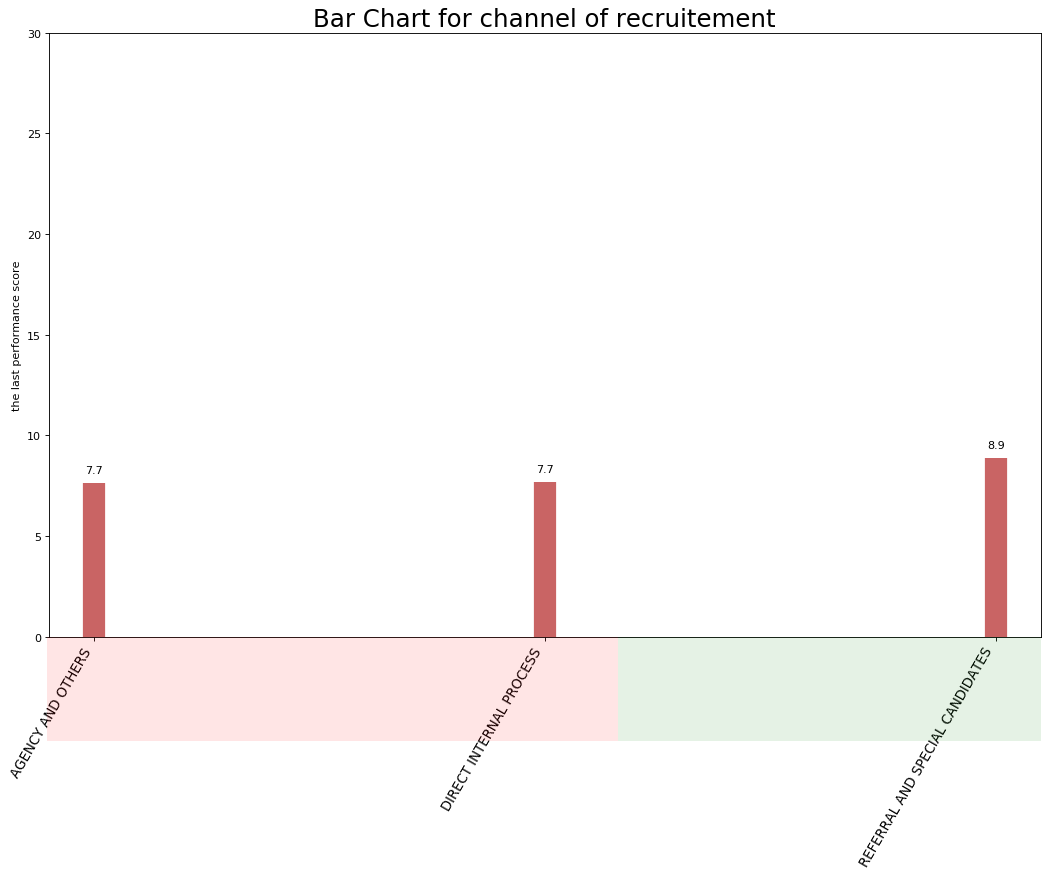

In [94]:
# Prepare Data

df = data[['Last_performance_score', 'Channel_of_Recruitment']].groupby('Channel_of_Recruitment').apply(lambda x: x.mean())
df.sort_values('Last_performance_score', inplace=True)
df.reset_index(inplace=True)

# Draw plot
import matplotlib.patches as patches

fig, ax = plt.subplots(figsize=(16,10), facecolor='white', dpi= 80)
ax.vlines(x=df.index, ymin=0, ymax=df.Last_performance_score, color='firebrick', alpha=0.7, linewidth=20)

# Annotate Text
for i, Last_performance_score in enumerate(df.Last_performance_score):
    ax.text(i, Last_performance_score+0.5, round(Last_performance_score, 1), horizontalalignment='center')


# Title, Label, Ticks and Ylim
ax.set_title('Bar Chart for channel of recruitement', fontdict={'size':22})
ax.set(ylabel='the last performance score', ylim=(0, 30))
plt.xticks(df.index, df.Channel_of_Recruitment.str.upper(), rotation=60, horizontalalignment='right', fontsize=12)

# Add patches to color the X axis labels
p1 = patches.Rectangle((.57, -0.005), width=.33, height=.13, alpha=.1, facecolor='green', transform=fig.transFigure)
p2 = patches.Rectangle((.124, -0.005), width=.446, height=.13, alpha=.1, facecolor='red', transform=fig.transFigure)
fig.add_artist(p1)
fig.add_artist(p2)
plt.show()

AttributeError: Can only use .str accessor with string values, which use np.object_ dtype in pandas

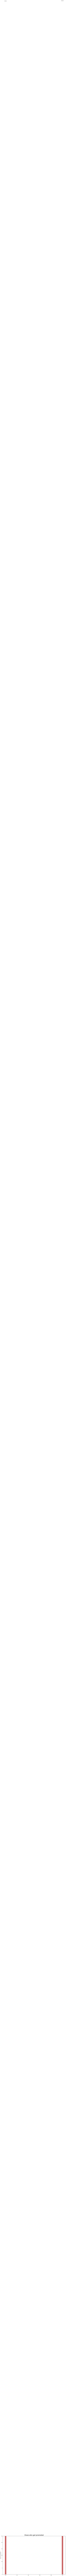

In [96]:
df = data[['Year_of_recruitment', 'Promoted_or_Not']].groupby('Promoted_or_Not').apply(lambda x: x.mean())
df.sort_values('Year_of_recruitment', inplace=True)
df.reset_index(inplace=True)

# Draw plot
import matplotlib.patches as patches

fig, ax = plt.subplots(figsize=(16,10), facecolor='white', dpi= 80)
ax.vlines(x=df.index, ymin=0, ymax=df.Year_of_recruitment, color='firebrick', alpha=0.7, linewidth=20)

# Annotate Text
for i, Year_of_recruitment in enumerate(df.Year_of_recruitment):
    ax.text(i, Last_performance_score+0.5, round(Year_of_recruitment, 1), horizontalalignment='center')


# Title, Label, Ticks and Ylim
ax.set_title('those who got promoted', fontdict={'size':22})
ax.set(ylabel='years of recruitment', ylim=(0, 30))
plt.xticks(df.index, df.Promoted_or_Not.str.upper(), rotation=60, horizontalalignment='right', fontsize=12)

# Add patches to color the X axis labels
p1 = patches.Rectangle((.57, -0.005), width=.33, height=.13, alpha=.1, facecolor='green', transform=fig.transFigure)
p2 = patches.Rectangle((.124, -0.005), width=.446, height=.13, alpha=.1, facecolor='red', transform=fig.transFigure)
fig.add_artist(p1)
fig.add_artist(p2)
plt.show()

In [9]:
df = data.copy()

In [10]:
del df['EmployeeNo']     
del df['Trainings_Attended'] 
del df['Gender']                                 
del df['State_Of_Origin']                        

In [11]:
df.head()

,Division,Qualification,Channel_of_Recruitment,Year_of_birth,Last_performance_score,Year_of_recruitment,Targets_met,Previous_Award,Training_score_average,Foreign_schooled,Marital_Status,Past_Disciplinary_Action,Previous_IntraDepartmental_Movement,No_of_previous_employers,Promoted_or_Not
0,Commercial Sales and Marketing,"MSc, MBA and PhD",Direct Internal process,1986,12.5,2011,1,0,41,No,Married,No,No,0,0
1,Customer Support and Field Operations,First Degree or HND,Agency and others,1991,12.5,2015,0,0,52,Yes,Married,No,No,0,0
2,Commercial Sales and Marketing,First Degree or HND,Direct Internal process,1987,7.5,2012,0,0,42,Yes,Married,No,No,0,0
3,Commercial Sales and Marketing,First Degree or HND,Agency and others,1982,2.5,2009,0,0,42,Yes,Single,No,No,1,0
4,Information and Strategy,First Degree or HND,Direct Internal process,1990,7.5,2012,0,0,77,Yes,Married,No,No,1,0


In [12]:
df = pd.get_dummies(df)

In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [14]:
scaler.fit(df)

C:\Users\maximus\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


StandardScaler(copy=True, with_mean=True, with_std=True)

In [18]:
X = df.drop('Promoted_or_Not', axis= 1)
y = df['Promoted_or_Not']

In [19]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size = 0.80)

C:\Users\maximus\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [20]:
from xgboost.sklearn import XGBClassifier

import xgboost as xgb
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

In [14]:
clf = xgb.XGBClassifier(n_estimators=10000)
eval_set = [(x_train, y_train), (x_test, y_test)]
clf.fit(x_train, y_train, eval_set=eval_set,
       eval_metric="auc", early_stopping_rounds=30)

[0]	validation_0-auc:0.75449	validation_1-auc:0.760479
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 30 rounds.
[1]	validation_0-auc:0.761685	validation_1-auc:0.767679
[2]	validation_0-auc:0.761577	validation_1-auc:0.7674
[3]	validation_0-auc:0.767971	validation_1-auc:0.769682
[4]	validation_0-auc:0.767775	validation_1-auc:0.769505
[5]	validation_0-auc:0.768202	validation_1-auc:0.769746
[6]	validation_0-auc:0.794111	validation_1-auc:0.795547
[7]	validation_0-auc:0.812636	validation_1-auc:0.810957
[8]	validation_0-auc:0.8164	validation_1-auc:0.813688
[9]	validation_0-auc:0.817637	validation_1-auc:0.815461
[10]	validation_0-auc:0.830884	validation_1-auc:0.826295
[11]	validation_0-auc:0.830602	validation_1-auc:0.82656
[12]	validation_0-auc:0.837091	validation_1-auc:0.831173
[13]	validation_0-auc:0.837816	validation_1-auc:0.832902
[14]	validation_0-auc:0.837542	validation_1-auc:0.832938
[15]

[141]	validation_0-auc:0.913003	validation_1-auc:0.893762
[142]	validation_0-auc:0.912955	validation_1-auc:0.893595
[143]	validation_0-auc:0.912953	validation_1-auc:0.893599
[144]	validation_0-auc:0.913002	validation_1-auc:0.893514
[145]	validation_0-auc:0.913547	validation_1-auc:0.893967
[146]	validation_0-auc:0.913951	validation_1-auc:0.894534
[147]	validation_0-auc:0.913985	validation_1-auc:0.894489
[148]	validation_0-auc:0.914053	validation_1-auc:0.894634
[149]	validation_0-auc:0.914146	validation_1-auc:0.894862
[150]	validation_0-auc:0.914184	validation_1-auc:0.894775
[151]	validation_0-auc:0.914287	validation_1-auc:0.894722
[152]	validation_0-auc:0.91432	validation_1-auc:0.894719
[153]	validation_0-auc:0.914394	validation_1-auc:0.894738
[154]	validation_0-auc:0.914517	validation_1-auc:0.89468
[155]	validation_0-auc:0.914622	validation_1-auc:0.894606
[156]	validation_0-auc:0.914761	validation_1-auc:0.894753
[157]	validation_0-auc:0.914782	validation_1-auc:0.894746
[158]	validation

[283]	validation_0-auc:0.92318	validation_1-auc:0.898888
[284]	validation_0-auc:0.923229	validation_1-auc:0.898892
[285]	validation_0-auc:0.923235	validation_1-auc:0.898877
[286]	validation_0-auc:0.923271	validation_1-auc:0.898837
[287]	validation_0-auc:0.923288	validation_1-auc:0.89883
[288]	validation_0-auc:0.923418	validation_1-auc:0.898789
[289]	validation_0-auc:0.92342	validation_1-auc:0.898791
[290]	validation_0-auc:0.923427	validation_1-auc:0.898731
[291]	validation_0-auc:0.923484	validation_1-auc:0.898762
[292]	validation_0-auc:0.923499	validation_1-auc:0.898777
[293]	validation_0-auc:0.923531	validation_1-auc:0.898747
[294]	validation_0-auc:0.923588	validation_1-auc:0.898715
[295]	validation_0-auc:0.923591	validation_1-auc:0.898708
[296]	validation_0-auc:0.923649	validation_1-auc:0.898748
[297]	validation_0-auc:0.923654	validation_1-auc:0.898719
[298]	validation_0-auc:0.923731	validation_1-auc:0.898706
[299]	validation_0-auc:0.92378	validation_1-auc:0.898682
[300]	validation_0

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=10000, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1)

In [39]:
features = ["your list of features.."]
mapFeat = dict(zip(["f"+str for i in range(len(features))], features))
ts = pd.Series(clf.booster().get_fscore())
ts.index = ts.reset_index()['index'].map(mapFeat)
ts.order()[-15:].plot(kind="barh", tittle=("features importance"))

TypeError: can only concatenate str (not "type") to str

In [21]:
#import dataiku
import pandas as pd, numpy as np
#from dataiku import pandasutils as pdu
from sklearn.metrics import roc_auc_score
import xgboost as xgb 
from hyperopt import hp, fmin, tpe,STATUS_OK

In [58]:
testd = pd.read_csv(r'C:\Users\maximus\Videos\data analyses\intercampusai2019\test.csv')
sample = pd.read_csv(r'C:\Users\maximus\Videos\data analyses\intercampusai2019\sample_submission2.csv')

,EmployeeNo,Division,Qualification,Gender,Channel_of_Recruitment,Trainings_Attended,Year_of_birth,Last_performance_score,Year_of_recruitment,Targets_met,Previous_Award,Training_score_average,State_Of_Origin,Foreign_schooled,Marital_Status,Past_Disciplinary_Action,Previous_IntraDepartmental_Movement,No_of_previous_employers
0,YAK/S/00005,Information Technology and Solution Support,First Degree or HND,Male,Agency and others,2,1976,7.5,2017,0,0,65,FCT,Yes,Married,No,No,1
1,YAK/S/00011,Information Technology and Solution Support,NaN,Male,Direct Internal process,2,1991,0.0,2018,0,0,69,OGUN,Yes,Married,No,No,1
2,YAK/S/00015,Research and Innovation,"MSc, MBA and PhD",Male,Direct Internal process,2,1984,7.5,2012,0,0,76,KANO,Yes,Married,No,No,1
3,YAK/S/00016,Customer Support and Field Operations,First Degree or HND,Male,Agency and others,2,1984,2.5,2009,0,0,52,RIVERS,No,Single,No,No,1
4,YAK/S/00017,Information Technology and Solution Support,First Degree or HND,Male,Agency and others,2,1983,7.5,2014,1,0,69,FCT,Yes,Married,No,No,0


In [59]:
testn = testd.copy()

In [60]:
del testn['EmployeeNo']
del testn['Gender']
del testn['State_Of_Origin']
del testn['Trainings_Attended']


In [61]:
test = pd.get_dummies(testn)

In [62]:
del test['Past_Disciplinary_Action_No']
del test['No_of_previous_employers_3'] 
del test['Channel_of_Recruitment_Agency and others'] 
del test['Foreign_schooled_Yes'] 
del test['Year_of_recruitment'] 
del test['Marital_Status_Married'] 
del test['Qualification_Non-University Education'] 

In [63]:
scaler.fit(test)

C:\Users\maximus\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


StandardScaler(copy=True, with_mean=True, with_std=True)

In [30]:
y_pred = clf.predict(test).astype(int)
sample.Promoted_or_Not = y_pred
sample.to_csv('intercampus11.csv',index =False)

NameError: name 'clf' is not defined

In [68]:
sample.EmployeeNo = testd.EmployeeNo

In [69]:
sample.head()

,EmployeeNo,Promoted_or_Not
0,YAK/S/00005,0
1,YAK/S/00011,0
2,YAK/S/00015,0
3,YAK/S/00016,0
4,YAK/S/00017,0


In [32]:
sample.Promoted_or_Not = y_pred

In [33]:
sample.to_csv('intercampus11.csv',index =False)

In [44]:
xgb1 = XGBClassifier(learning_rate =0.1, n_estimators=10000, max_depth=5, min_child_weight = 1, gamma=0, subsample=0.8, colsample_bytree=0.8, objective='binary:logistic', nthread=4, scale_pos_weight=1, seed=27)

In [72]:
clfr = xgb.XGBClassifier(learning_rate =0.1, n_estimators=10000, max_depth=5, min_child_weight = 1, gamma=0, subsample=0.8, colsample_bytree=0.8, objective='binary:logistic', nthread=4, scale_pos_weight=1, seed=27)
eval_set = [(x_train, y_train), (x_test, y_test)]
clfr.fit(x_train, y_train, eval_set=eval_set,
       eval_metric="auc", early_stopping_rounds=30)

[0]	validation_0-auc:0.834723	validation_1-auc:0.827786
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 30 rounds.
[1]	validation_0-auc:0.856259	validation_1-auc:0.85053
[2]	validation_0-auc:0.868814	validation_1-auc:0.860867
[3]	validation_0-auc:0.871213	validation_1-auc:0.866082
[4]	validation_0-auc:0.875336	validation_1-auc:0.869241
[5]	validation_0-auc:0.877125	validation_1-auc:0.87302
[6]	validation_0-auc:0.878407	validation_1-auc:0.870216
[7]	validation_0-auc:0.878546	validation_1-auc:0.8695
[8]	validation_0-auc:0.877051	validation_1-auc:0.870067
[9]	validation_0-auc:0.878067	validation_1-auc:0.870473
[10]	validation_0-auc:0.877061	validation_1-auc:0.867441
[11]	validation_0-auc:0.877455	validation_1-auc:0.866889
[12]	validation_0-auc:0.883285	validation_1-auc:0.874577
[13]	validation_0-auc:0.882286	validation_1-auc:0.87359
[14]	validation_0-auc:0.883098	validation_1-auc:0.872653
[15

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.8, gamma=0,
       learning_rate=0.1, max_delta_step=0, max_depth=5,
       min_child_weight=1, missing=None, n_estimators=10000, n_jobs=1,
       nthread=4, objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=27, silent=None,
       subsample=0.8, verbosity=1)

In [68]:
y_pred1 = clfr.predict(test).astype(int)


In [69]:
sample.Promoted_or_Not = y_pred1

In [70]:
sample.to_csv('intercampus8.csv',index =False)

,EmployeeNo,Promoted_or_Not
0,YAK/S/00005,0
1,YAK/S/00011,0
2,YAK/S/00015,0
3,YAK/S/00016,0
4,YAK/S/00017,0
5,YAK/S/00019,0
6,YAK/S/00027,0
7,YAK/S/00028,0
8,YAK/S/00031,0
9,YAK/S/00032,0


# LETS TRY BAGGING 

In [34]:
from sklearn.ensemble import BaggingClassifier, ExtraTreesClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.linear_model import RidgeClassifier 
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

In [35]:
import numpy as np
seed = 1075
np.random.seed(seed)

In [49]:
etc= RandomForestClassifier()
knn = KNeighborsClassifier()
svc = SVC()
rg = RidgeClassifier()
xgb = XGBClassifier()


In [78]:
clf_array = [etc, knn, svc, rg, xgb]

In [84]:
for clf in clf_array: scores = cross_val_score(clf, X, y, cv=10, n_jobs=-1)
bagging_clf = BaggingClassifier(clf, max_samples=0.4, max_features=10 , random_state=seed)
bagging_scores = cross_val_score(bagging_clf, X, y, cv=10, n_jobs=-1)

In [86]:
bagging_clf.fit(x_train, y_train)


BaggingClassifier(base_estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1),
         bootstrap=True, bootstrap_features=False, max_features=10,
         max_samples=0.4, n_estimators=10, n_jobs=None, oob_score=False,
         random_state=1075, verbose=0, warm_start=False)

In [87]:
y_pred2 = bagging_clf.predict(test).astype(int)


In [127]:
y_pred= bagging_clf.predict(x_test)
score = f1_score(y_test, y_pred)
print(score)

0.0436046511627907


In [ ]:
# OUR F1_SCORE FOR THE ABOVE BAGGING CLASSIFIER IS VERY LOW COMPARED TO THE OTHER ALGORITHMS WITH OUT BAGGING

In [128]:

confusion_matrix(y_test, y_pred)

NameError: name 'confusion_matrix' is not defined

In [67]:
sample.Promoted_or_Not = y_pred2


NameError: name 'y_pred2' is not defined

In [90]:
sample.to_csv('intercampus9.csv',index =False)

In [18]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [98]:
ada_clf = AdaBoostClassifier()
gbc_clf = GradientBoostingClassifier()
xgb_clf = XGBClassifier()

In [102]:
boost_array = [ada_clf, gbc_clf, xgb_clf]

In [107]:
from sklearn.ensemble import VotingClassifier

In [109]:
All_clf = VotingClassifier(boost_array, voting='hard')

In [111]:
from sklearn.metrics import f1_score

In [113]:
scores = cross_val_score(All_clf, X, y, cv=10, scoring='accuracy')

C:\Users\maximus\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:542: FutureWarning: From version 0.22, errors during fit will result in a cross validation score of NaN by default. Use error_score='raise' if you want an exception raised or error_score=np.nan to adopt the behavior from version 0.22.
  FutureWarning)


AttributeError: 'AdaBoostClassifier' object has no attribute 'estimators_'

# BAGGING with only XGBOOST

In [24]:
from sklearn.ensemble import AdaBoostClassifier

In [25]:
clfr = xgb.XGBClassifier(learning_rate =0.1, n_estimators=10000, max_depth=5, min_child_weight = 1, gamma=0, subsample=0.8, colsample_bytree=0.8, objective='binary:logistic', nthread=4, scale_pos_weight=1, seed=27)
xgb_clf = XGBClassifier(learning_rate =0.1, n_estimators=10000, max_depth=5, min_child_weight = 1, gamma=0, subsample=0.8, colsample_bytree=0.8, objective='binary:logistic', nthread=4, scale_pos_weight=1, seed=27)
ada = AdaBoostClassifier()

In [26]:
for clf in ada: scores = cross_val_score(clf, X, y, cv=10, n_jobs=-1)
bagging_clf2 = BaggingClassifier(clf, max_samples=0.4, max_features=10 , random_state=seed)
bagging_scores = cross_val_score(bagging_clf2, X, y, cv=10, n_jobs=-1)

AttributeError: 'AdaBoostClassifier' object has no attribute 'estimators_'

In [29]:
from sklearn.ensemble import GradientBoostingClassifier

In [33]:
from mlxtend.classifier import EnsembleVoteClassifier

In [41]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score

# lets try boosting 

In [30]:
ada_boost = AdaBoostClassifier()
grad_boost = GradientBoostingClassifier()
xgb_boost = XGBClassifier()

In [31]:
boost_array = [ada_boost, grad_boost, xgb_boost]

In [34]:
eclf = EnsembleVoteClassifier(clfs=[ada_boost, grad_boost, xgb_boost], voting='hard')

In [35]:
labels = ['Ada Boost', 'Grad Boost', 'XG Boost', 'Ensemble']

In [43]:
for clf, label in zip([ada_boost, grad_boost, xgb_boost, eclf], labels):
    scores = cross_val_score(clf, X, y, cv=10, scoring='accuracy')

In [44]:
print(scores)

[0.939473   0.93918037 0.9339598  0.93918037 0.93787523 0.94048551
 0.93552597 0.94231271 0.94022448 0.93891934]


In [57]:
eclf.fit(x_train, y_train)
y_pred = eclf.predict(x_test)
score = f1_score(y_test, y_pred)
print(score)

0.43329253365973075


In [52]:
y_pred = eclf.predict(test).astype(int)

In [54]:
sample.Promoted_or_Not = y_pred
sample.to_csv('intercampus12.csv',index =False)

# stratified k fold with xgboost

In [114]:
from sklearn.model_selection import StratifiedKFold

In [115]:
kfold = 5
skf = StratifiedKFold(n_splits=kfold, random_state=42)

In [116]:
params = {'min_child_weight': 10.0, 'objective': 'binary:logistic', 'max_depth': 7, 'max_delta_step': 1.8, 'colsample_bytree': 0.4, 'subsample': 0.8, 'eta': 0.025, 'gamma': 0.65, 'num_boost_round': 700}

In [118]:
for i, (train_index, test_index) in enumerate(skf.split(X, y)): print('[Fold %d/%d]' % (i + 1, kfold))

[Fold 1/5]
[Fold 2/5]
[Fold 3/5]
[Fold 4/5]
[Fold 5/5]


In [122]:
X_train, X_valid = X.iloc[train_index], X.iloc[test_index]
y_train, y_valid= y.iloc[train_index], y.iloc[test_index]

In [123]:
#converting the data to xgboost format
d_train = xgb.DMatrix(X_train, y_train)
d_valid = xgb.DMatrix(y_train, y_valid)
d_test = xgb.DMatrix(test.values)
watchlist = [(d_train, 'train'), (d_valid, 'valid')]

AttributeError: 'XGBClassifier' object has no attribute 'DMatrix'

In [79]:
clf_try = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=10000, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1)

In [140]:
clf_try.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=10000, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1)

In [142]:
y_pred = clf_try.predict(X_valid)
score = f1_score(y_valid, y_pred)
print(score)

0.48879837067209775


In [144]:
y_pred = clf_try.predict(test).astype(int)


In [145]:
sample.Promoted_or_Not = y_pred
sample.to_csv('intercampus10.csv',index =False)

# lets check the feature importance of our models

In [67]:
def important_features(x_train, y_train, clf):
    """x_train: train data
     y_train : train target data
     clf : algorithm
     """
    
    clf.fit(x_train, y_train)
    return sorted([(i, j) for i, j in zip(x_train.columns, clf.feature_importances_)], reverse=True, key=lambda x: x[1])

In [58]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [59]:
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)

In [66]:
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(38,'Score'))  #print 10 best features

                                                Specs        Score
5                              Training_score_average  3934.505005
4                                      Previous_Award  1518.545947
3                                         Targets_met  1249.518420
1                              Last_performance_score   999.330013
9   Division_Information Technology and Solution S...    33.348765
7             Division_Commercial Sales and Marketing    24.296496
16                     Qualification_MSc, MBA and PhD    19.699993
11                      Division_People/HR Management    16.847330
20  Channel_of_Recruitment_Referral and Special ca...    14.047592
14                   Division_Sourcing and Purchasing     9.707663
12             Division_Regulatory and Legal services     7.775183
13                   Division_Research and Innovation     4.677651
10                  Division_Information and Strategy     3.830396
24                            Marital_Status_Not_Sure     2.44

In [55]:
df_imp = df.copy()

In [16]:
del df_imp['Past_Disciplinary_Action_No']
del df_imp['No_of_previous_employers_3'] 
del df_imp['Channel_of_Recruitment_Agency and others'] 
del df_imp['Foreign_schooled_Yes'] 
del df_imp['Year_of_recruitment'] 
del df_imp['Marital_Status_Married'] 
del df_imp['Qualification_Non-University Education'] 

In [36]:
x_importance = df_imp.drop('Promoted_or_Not', axis= 1)
y_importance = df_imp['Promoted_or_Not']
X_train, X_test, Y_train, Y_test = train_test_split(x_importance, y_importance, train_size = 0.80)

C:\Users\maximus\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [80]:
clf = xgb.XGBClassifier(n_estimators=10000)
eval_set = [(X_train, Y_train), (X_test, Y_test)]
clf.fit(X_train, Y_train, eval_set=eval_set,
       eval_metric="auc", early_stopping_rounds=30)

[0]	validation_0-auc:0.752056	validation_1-auc:0.769893
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 30 rounds.
[1]	validation_0-auc:0.75879	validation_1-auc:0.778814
[2]	validation_0-auc:0.758672	validation_1-auc:0.778696
[3]	validation_0-auc:0.758272	validation_1-auc:0.778142
[4]	validation_0-auc:0.759905	validation_1-auc:0.778535
[5]	validation_0-auc:0.788888	validation_1-auc:0.797083
[6]	validation_0-auc:0.788649	validation_1-auc:0.79674
[7]	validation_0-auc:0.808772	validation_1-auc:0.81249
[8]	validation_0-auc:0.80911	validation_1-auc:0.812686
[9]	validation_0-auc:0.828498	validation_1-auc:0.829125
[10]	validation_0-auc:0.827854	validation_1-auc:0.829211
[11]	validation_0-auc:0.830118	validation_1-auc:0.830682
[12]	validation_0-auc:0.839084	validation_1-auc:0.833426
[13]	validation_0-auc:0.830512	validation_1-auc:0.831153
[14]	validation_0-auc:0.841814	validation_1-auc:0.834394
[1

[141]	validation_0-auc:0.90968	validation_1-auc:0.893417
[142]	validation_0-auc:0.909941	validation_1-auc:0.893575
[143]	validation_0-auc:0.909982	validation_1-auc:0.893619
[144]	validation_0-auc:0.910133	validation_1-auc:0.893817
[145]	validation_0-auc:0.910138	validation_1-auc:0.893835
[146]	validation_0-auc:0.910281	validation_1-auc:0.89376
[147]	validation_0-auc:0.910386	validation_1-auc:0.893786
[148]	validation_0-auc:0.910401	validation_1-auc:0.893482
[149]	validation_0-auc:0.91071	validation_1-auc:0.893825
[150]	validation_0-auc:0.910833	validation_1-auc:0.894221
[151]	validation_0-auc:0.911483	validation_1-auc:0.895141
[152]	validation_0-auc:0.911593	validation_1-auc:0.895371
[153]	validation_0-auc:0.911675	validation_1-auc:0.895375
[154]	validation_0-auc:0.911692	validation_1-auc:0.895442
[155]	validation_0-auc:0.911714	validation_1-auc:0.895473
[156]	validation_0-auc:0.911761	validation_1-auc:0.895436
[157]	validation_0-auc:0.911826	validation_1-auc:0.895386
[158]	validation_

[283]	validation_0-auc:0.920331	validation_1-auc:0.897738
[284]	validation_0-auc:0.920331	validation_1-auc:0.897708
[285]	validation_0-auc:0.920363	validation_1-auc:0.897671
[286]	validation_0-auc:0.92038	validation_1-auc:0.897752
[287]	validation_0-auc:0.920421	validation_1-auc:0.897646
[288]	validation_0-auc:0.920429	validation_1-auc:0.897622
[289]	validation_0-auc:0.920436	validation_1-auc:0.897626
[290]	validation_0-auc:0.92044	validation_1-auc:0.89758
[291]	validation_0-auc:0.920474	validation_1-auc:0.897697
[292]	validation_0-auc:0.920471	validation_1-auc:0.897723
[293]	validation_0-auc:0.920499	validation_1-auc:0.897711
[294]	validation_0-auc:0.920552	validation_1-auc:0.897704
[295]	validation_0-auc:0.920567	validation_1-auc:0.897713
[296]	validation_0-auc:0.920573	validation_1-auc:0.897718
[297]	validation_0-auc:0.920578	validation_1-auc:0.897719
[298]	validation_0-auc:0.920635	validation_1-auc:0.897711
Stopping. Best iteration:
[268]	validation_0-auc:0.919556	validation_1-auc:

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=10000, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1)

In [62]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

C:\Users\maximus\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[0.16760112 0.07682616 0.13385977 0.05113278 0.03709097 0.30472363
 0.00490014 0.02993052 0.01176072 0.00796362 0.00602103 0.00442922
 0.00161721 0.00358031 0.01159524 0.01025993 0.00743195 0.00195559
 0.01196262 0.01161758 0.00339636 0.0064155  0.00634056 0.00928346
 0.00248292 0.00910472 0.00090795 0.00081002 0.00740166 0.00625209
 0.01359207 0.01361034 0.00625592 0.00612304 0.00559903 0.00366465
 0.0024996 ]


<Figure size 640x480 with 1 Axes>

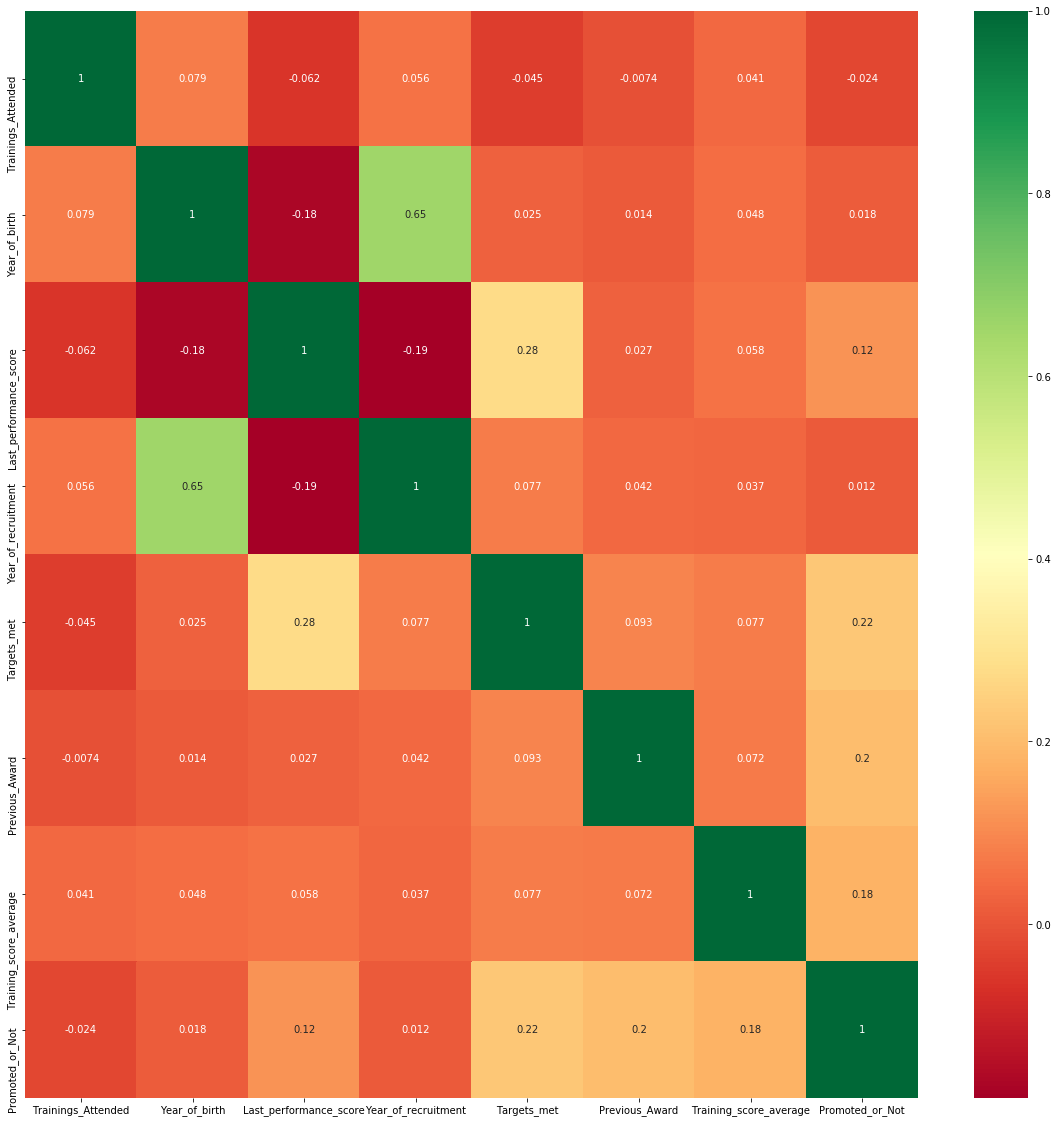

In [64]:
#get correlations of each features in dataset
import seaborn as sns
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [68]:
def important_features(x_train, y_train, clf):
    """x_train: train data
     y_train : train target data
     clf : algorithm
     """
    
    clf.fit(x_train, y_train)
    return sorted([(i, j) for i, j in zip(x_train.columns, clf.feature_importances_)], reverse=True, key=lambda x: x[1])

In [82]:
from catboost import CatBoostClassifier

AttributeError: type object '_catboost._FloatArrayWrapper' has no attribute '__reduce_cython__'

In [26]:
xgb_clf = xgb.XGBClassifier(tree_method = "exact", predictor = "cpu_predictor", verbosity = True,
                            objective="multi:softmax")

In [24]:
import xgboost as xgb

In [25]:
from xgboost import XGBClassifier

xgc = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                    colsample_bytree=1, gamma=0, learning_rate=0.3, max_delta_step=0,
                    max_depth = 7, min_child_weight=1, missing=None, n_estimators=100,
                    n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
                    reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
                    silent=True, subsample=1)


In [37]:


xgc.fit(X_train, Y_train)
y_pred = xgc.predict(X_test)
score = f1_score(Y_test, y_pred)
print(score)

0.5156576200417536


# since the model above inproved after we droped some columns of low feature importance, lets try dropping others with very similarly low feature importance.

In [15]:
df_imp = df.copy()

In [19]:
del df_imp['Past_Disciplinary_Action_No']
del df_imp['No_of_previous_employers_3'] 
del df_imp['Channel_of_Recruitment_Agency and others'] 
del df_imp['Foreign_schooled_Yes'] 
del df_imp['Year_of_recruitment'] 
del df_imp['Marital_Status_Married'] 
del df_imp['Qualification_Non-University Education'] 
del df_imp['Channel_of_Recruitment_Direct Internal process']
del df_imp['Year_of_birth']   
del df_imp['Foreign_schooled_No']     
del df_imp['No_of_previous_employers_More than 5']     
del df_imp['Previous_IntraDepartmental_Movement_No']     
del df_imp['No_of_previous_employers_1']     
del df_imp['Division_Business Finance Operations']


KeyError: 'Channel_of_Recruitment_Direct Internal process'

# lets preprocess our test data

In [64]:
del test['Channel_of_Recruitment_Direct Internal process']
del test['Year_of_birth']   
del test['Foreign_schooled_No']     
del test['No_of_previous_employers_More than 5']     
del test['Previous_IntraDepartmental_Movement_No']     
del test['No_of_previous_employers_1']     
del test['Division_Business Finance Operations']


In [28]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

In [22]:
x1_importance = df_imp.drop('Promoted_or_Not', axis= 1)
y1_importance = df_imp['Promoted_or_Not']
X1_train, X1_test, Y1_train, Y1_test = train_test_split(x1_importance, y1_importance, train_size = 0.80)

C:\Users\maximus\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [29]:
xgc.fit(X1_train, Y1_train)
y_pred = xgc.predict(X1_test)
score = f1_score(Y1_test, y_pred)
print(score)

0.49678800856531047


In [70]:
y_pred = xgc.predict(test).astype(int)
sample.Promoted_or_Not = y_pred
sample.to_csv('intercampus14.csv',index =False)

In [36]:
xgb1 = XGBClassifier(learning_rate =0.1, n_estimators=1000, max_depth=5, min_child_weight = 1, gamma=0, subsample=0.8, colsample_bytree=0.8, objective='binary:logistic', nthread=4, scale_pos_weight=1, seed=27)

In [37]:
xgb1.fit(X1_train, Y1_train)
y_pred1 = xgb1.predict(X1_test)
score1 = f1_score(Y1_test, y_pred1)
print(score1)

0.4935897435897435


In [73]:
y_pred = xgb1.predict(test).astype(int)
sample.Promoted_or_Not = y_pred
sample.to_csv('intercampus15.csv',index =False)

In [80]:
clf_try.fit(X1_train, Y1_train)
y_pred1 = clf_try.predict(X1_test)
score1 = f1_score(Y1_test, y_pred1)
print(score1)

0.4952380952380953


In [81]:
y_pred = clf_try.predict(test).astype(int)
sample.Promoted_or_Not = y_pred
sample.to_csv('intercampus17.csv',index =False)

In [84]:
clfr = xgb.XGBClassifier(learning_rate =0.1, n_estimators=10000, max_depth=5, min_child_weight = 1, gamma=0, subsample=0.8, colsample_bytree=0.8, objective='binary:logistic', nthread=4, scale_pos_weight=1, seed=27)

In [85]:
clfr.fit(X1_train, Y1_train)
y_pred1 = clfr.predict(X1_test)
score1 = f1_score(Y1_test, y_pred1)
print(score1)

0.4636871508379888


In [86]:
y_pred = clfr.predict(test).astype(int)
sample.Promoted_or_Not = y_pred
sample.to_csv('intercampus18.csv',index =False)

# lets try using lightgbm

In [40]:
import lightgbm as lgbm

In [75]:
train_data = lgbm.Dataset(X1_train, Y1_train)
test_data = lgbm.Dataset(X1_test, Y1_test)


In [77]:
parameters = {
    'application': 'binary',
    'objective': 'binary',
    'metric': 'auc',
    'is_unbalance': 'true',
    'boosting': 'gbdt',
    'num_leaves': 31,
    'feature_fraction': 0.5,
    'bagging_fraction': 0.5,
    'bagging_freq': 20,
    'learning_rate': 0.05,
    'verbose': 0
}

model = lgbm.train(parameters,
                       train_data,
                       valid_sets=test_data,
                       num_boost_round=5000,
                       early_stopping_rounds=100)

[1]	valid_0's auc: 0.698866
Training until validation scores don't improve for 100 rounds
[2]	valid_0's auc: 0.841793
[3]	valid_0's auc: 0.847101
[4]	valid_0's auc: 0.840902
[5]	valid_0's auc: 0.838216
[6]	valid_0's auc: 0.838663
[7]	valid_0's auc: 0.844126
[8]	valid_0's auc: 0.84786
[9]	valid_0's auc: 0.857372
[10]	valid_0's auc: 0.857296
[11]	valid_0's auc: 0.855317
[12]	valid_0's auc: 0.858812
[13]	valid_0's auc: 0.857242
[14]	valid_0's auc: 0.855929
[15]	valid_0's auc: 0.859438
[16]	valid_0's auc: 0.861326
[17]	valid_0's auc: 0.862254
[18]	valid_0's auc: 0.861728
[19]	valid_0's auc: 0.864226
[20]	valid_0's auc: 0.86737
[21]	valid_0's auc: 0.866641
[22]	valid_0's auc: 0.868079
[23]	valid_0's auc: 0.867517
[24]	valid_0's auc: 0.868517
[25]	valid_0's auc: 0.86774
[26]	valid_0's auc: 0.866547
[27]	valid_0's auc: 0.868135
[28]	valid_0's auc: 0.870707
[29]	valid_0's auc: 0.870667
[30]	valid_0's auc: 0.870687
[31]	valid_0's auc: 0.873492
[32]	valid_0's auc: 0.872799
[33]	valid_0's auc: 0.

In [78]:
y_pred = model.predict(test).astype(int)
sample.Promoted_or_Not = y_pred
sample.to_csv('intercampus16.csv',index =False)

In [54]:
 def objective(params):
    params = {
        'num_leaves': int(params['num_leaves']),
        'colsample_bytree': '{:.3f}'.format(params['colsample_bytree']),
    }

In [53]:
 clf = lgbm.LGBMClassifier(n_estimators=500, learning_rate=0.01, params = params)
    
scoress = cross_val_score(clf, x1_importance, y1_importance, scoring=gini_scorer, cv=StratifiedKFold())

NameError: name 'params' is not defined

In [42]:
lgbm.fit(X1_train, Y1_train)
y_pred2 = lgbm.predict(X1_test)
score2 = f1_score(Y1_test, y_pred2)
print(score2)

AttributeError: module 'lightgbm' has no attribute 'fit'

In [41]:
del test['Past_Disciplinary_Action_No']
del test['No_of_previous_employers_3'] 
del test['Channel_of_Recruitment_Agency and others'] 
del test['Foreign_schooled_Yes'] 
del test['Year_of_recruitment'] 
del test['Marital_Status_Married'] 
del test['Qualification_Non-University Education'] 

KeyError: 'Past_Disciplinary_Action_No'

In [68]:
y_pred = xgc.predict(test).astype(int)
sample.Promoted_or_Not = y_pred
sample.to_csv('intercampus13.csv',index =False)

In [2]:
import catboost as cb

ValueError: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216 from C header, got 192 from PyObject

In [24]:
ada_boost = AdaBoostClassifier()
grad_boost = GradientBoostingClassifier()
xgb_boost = XGBClassifier()
from sklearn.ensemble import VotingClassifier

In [20]:
boost_array = [ada_boost, grad_boost, xgb_boost]

In [30]:
eclf = VotingClassifier(class = [ada_boost, grad_boost, xgb_boost], voting='hard')

SyntaxError: invalid syntax (<ipython-input-30-f4b59394b936>, line 1)

# making use of catboost algoritm on colab

In [70]:
from catboost import CatBoost

AttributeError: type object '_catboost._FloatArrayWrapper' has no attribute '__reduce_cython__'

In [17]:
from catboost import CatBoostClassifier

AttributeError: type object '_catboost._FloatArrayWrapper' has no attribute '__reduce_cython__'

In [ ]:
from google.colab import files
files.upload(train.csv)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
clf = cb.CatBoostClassifier()

In [ ]:
clf.fit(X1_train, Y1_train)

In [ ]:
y_pred = clf.predict(X1_test)
score = f1_score(Y1_test, y_pred)
print(score)

In [ ]:
y_pred = clf.predict(test).astype(int)
sample.Promoted_or_Not = y_pred
sample.to_csv('intercampus19.csv',index =False)